In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_validate,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data = pd.read_csv('customer_feedback_satisfaction.csv')

In [3]:
data

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.00
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.00
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.00
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.00
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.00
...,...,...,...,...,...,...,...,...,...,...,...
38439,38440,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,38441,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,38442,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,38443,28,Female,USA,105587,7,5,16,High,Silver,100.00


In [4]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()  # we can see there no outlier in this data

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


## Age

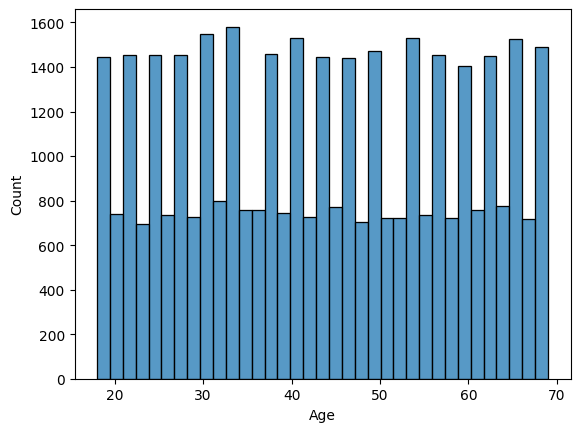

In [7]:
sns.histplot(data=data,x=data['Age'],bins=35)
plt.show()

##### Almost All age people come to gym equally

## Gender

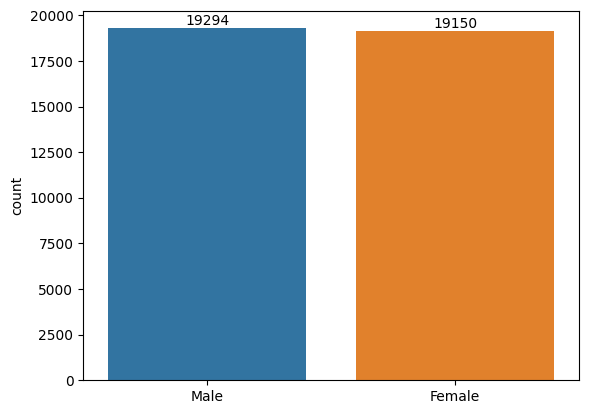

In [8]:
val = data['Gender'].value_counts()
sns.barplot(x = data['Gender'].unique() , y = data['Gender'].value_counts(),hue=data['Gender'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center',va='bottom')
plt.show()

<Figure size 9000x9000 with 0 Axes>

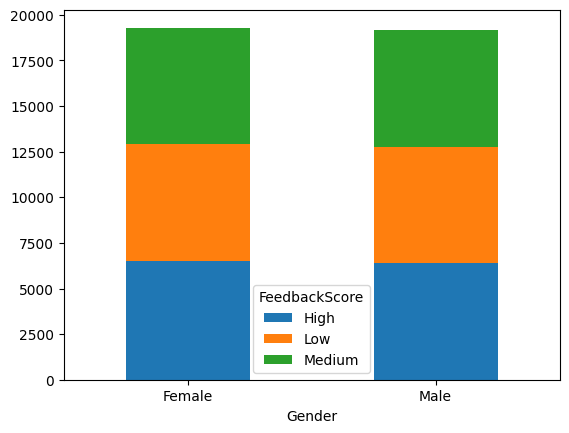

In [9]:
plt.figure(figsize=(90,90))
data.groupby(['Gender','FeedbackScore']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation='horizontal')
plt.show()

## Country

In [10]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Country', 'Income', 'ProductQuality',
       'ServiceQuality', 'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel',
       'SatisfactionScore'],
      dtype='object')

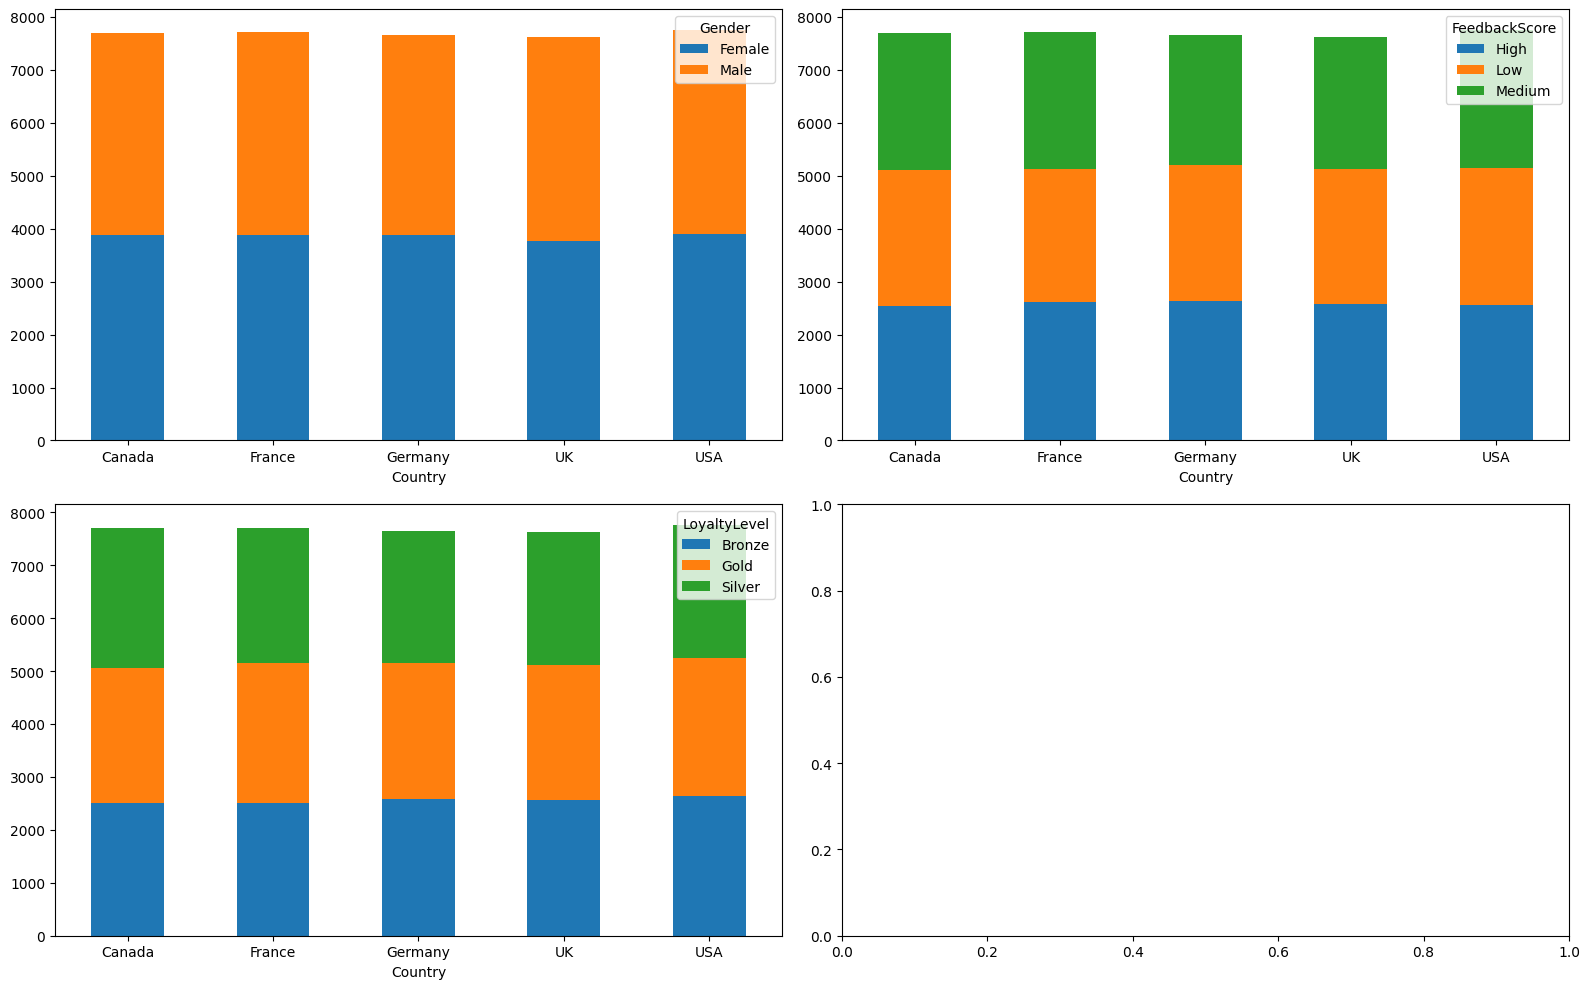

In [11]:
columns = ['Gender','FeedbackScore','LoyaltyLevel']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()
for index , value in enumerate(columns):
    data.groupby(['Country',value]).size().unstack().plot(kind='bar',stacked=True,ax = axes[index])
    axes[index].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()
    

In [12]:
data.head(3)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0


# Encoding

In [13]:
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])
data['Country'] = label.fit_transform(data['Country'])
data['FeedbackScore'] = label.fit_transform(data['FeedbackScore'])
data['LoyaltyLevel'] = label.fit_transform(data['LoyaltyLevel'])


In [14]:
data

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,1,3,83094,5,8,5,1,0,100.00
1,2,69,1,3,86860,10,2,8,2,1,100.00
2,3,46,0,4,60173,8,10,18,2,2,100.00
3,4,32,0,3,73884,7,10,16,1,1,100.00
4,5,60,1,3,97546,6,4,13,1,0,82.00
...,...,...,...,...,...,...,...,...,...,...,...
38439,38440,55,0,4,80880,6,3,14,0,2,75.85
38440,38441,44,1,0,42845,5,10,1,1,2,100.00
38441,38442,43,0,4,71433,7,9,7,2,0,100.00
38442,38443,28,0,4,105587,7,5,16,0,2,100.00


In [15]:
data.drop(columns=['CustomerID'],inplace=True)

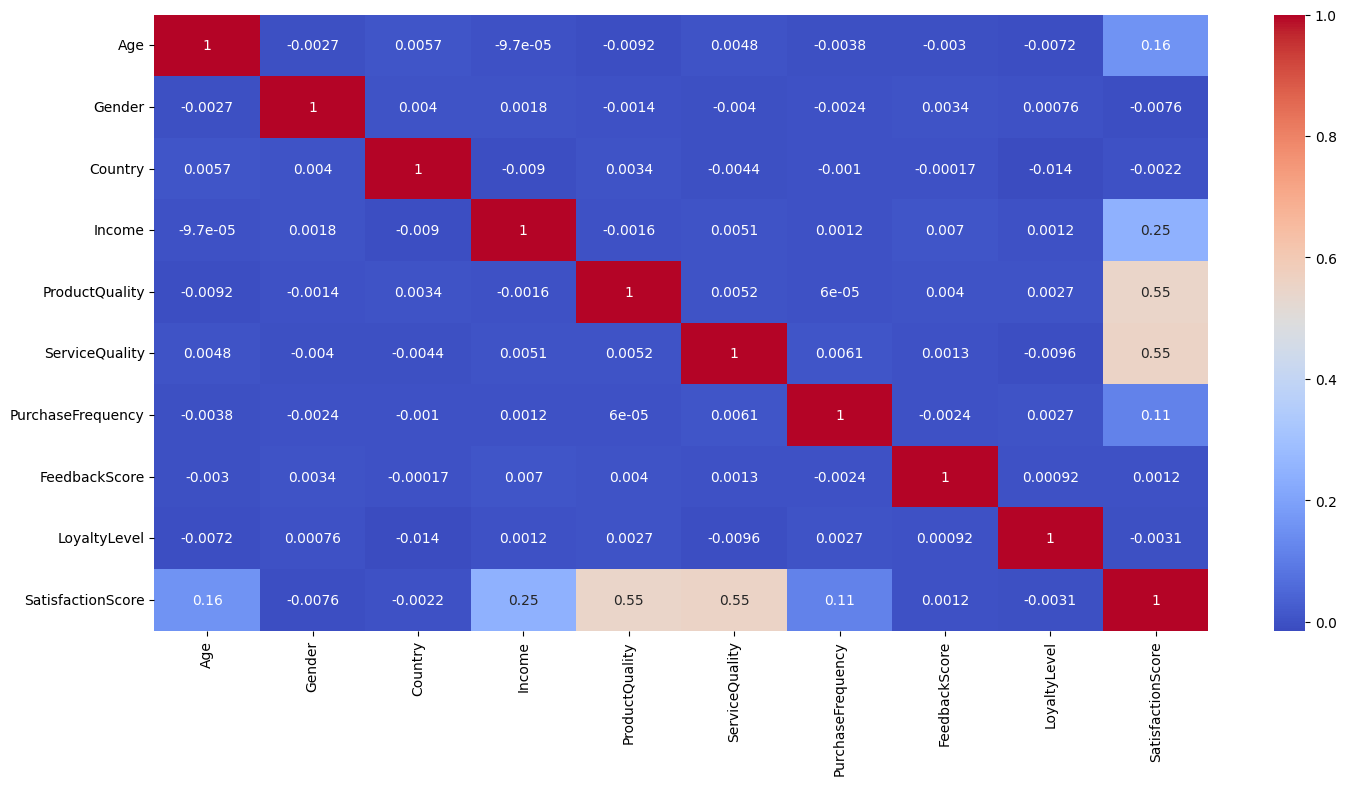

In [16]:
plt.figure(figsize=(17,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [17]:
data.head(1)

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,3,83094,5,8,5,1,0,100.0


In [18]:
x = data.drop(columns=['SatisfactionScore','Gender','Country','FeedbackScore','LoyaltyLevel'])
y = data['SatisfactionScore']

In [19]:
x['PurchaseFrequency'].value_counts()

PurchaseFrequency
7     1998
5     1978
12    1971
2     1958
1     1948
11    1946
17    1932
15    1930
6     1930
16    1924
8     1923
3     1923
4     1902
18    1899
13    1888
20    1887
19    1887
14    1881
9     1871
10    1868
Name: count, dtype: int64

In [20]:
x

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency
0,56,83094,5,8,5
1,69,86860,10,2,8
2,46,60173,8,10,18
3,32,73884,7,10,16
4,60,97546,6,4,13
...,...,...,...,...,...
38439,55,80880,6,3,14
38440,44,42845,5,10,1
38441,43,71433,7,9,7
38442,28,105587,7,5,16


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=56)

## Linear Regression

In [22]:
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 7.38
mean_squared_error : 85.48
r2_score : 0.70


## Decision Tree

In [23]:
# model = DecisionTreeRegressor()
# param_grid = {
#     'max_depth': [None, 5, 10, 15, 20, 25, 30],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
# }
# grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5)
# grid.fit(X_train,Y_train)

# best_perameters = grid.best_params_
# print(best_perameters)

In [24]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth= 9, min_samples_leaf= 10, min_samples_split= 15)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

scores = cross_val_score(model, x, y, cv=5)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')
print("Cross-validation scores : ", scores.mean())

mean_absolute_error : 5.87
mean_squared_error : 71.33
r2_score : 0.75
Cross-validation scores :  0.7471918308272499


## Random Forest

In [25]:
# param_grid = {            
#     'max_depth': [None, 6,10,8,12,15],        
#     'min_samples_split': [8,10,15,18],              
#     'min_samples_leaf': [4,8,10],                        
# }

# # Initialize the model
# rf_model = RandomForestRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, Y_train)

# # Display the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [76]:
model = RandomForestRegressor(n_estimators=150,max_depth= 10, min_samples_leaf= 2, min_samples_split= 3,random_state=42)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

# scores = cross_val_score(model, x, y, cv=5)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')
# print("Cross-validation scores : ", scores.mean())

mean_absolute_error : 5.49
mean_squared_error : 62.04
r2_score : 0.78


## Gradien Boost

In [66]:
model = GradientBoostingRegressor(n_estimators=150,learning_rate=0.1,max_depth=4,min_samples_leaf=3,min_samples_split=2)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

#scores = cross_val_score(model, x, y, cv=5)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')
#print("Cross-validation scores : ", scores.mean())

mean_absolute_error : 5.53
mean_squared_error : 59.40
r2_score : 0.79


## Light Gradient Boosting

In [28]:
import lightgbm as lgb

# Define the parameters for the regression model
params = {
    'objective': 'regression',      # Set the objective to 'regression' for regression tasks
    'metric': 'l2',                 # Use L2 (Mean Squared Error) for regression
    'boosting_type': 'gbdt',        # Specify the boosting type (Gradient Boosting Decision Tree)
    'num_leaves': 31,               # Set the number of leaves in each tree
    'learning_rate': 0.05,          # Define the learning rate
    'feature_fraction': 0.9         # Fraction of features to consider for each iteration
}

# Define your training and testing data
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test)

# Train the model with early stopping
num_rounds = 100
model = lgb.train(params, train_data, num_rounds, valid_sets=[test_data], valid_names=['test'])

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 30755, number of used features: 5
[LightGBM] [Info] Start training from score 85.230099
mean_absolute_error : 5.45
mean_squared_error : 59.68
r2_score : 0.79


## Xgboost

In [29]:
model = XGBRegressor(learning_rate=0.1,max_depth=5)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

#scores = cross_val_score(model, x, y, cv=5)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')
#print("Cross-validation scores : ", scores.mean())

mean_absolute_error : 5.46
mean_squared_error : 59.35
r2_score : 0.79


## Ann

In [31]:
# model = Sequential([
#     Dense(64,activation='relu',input_dim=X_train.shape[1]),
#     Dense(32,activation='relu'),
#     Dense(9,activation='relu'),
#     Dense(1),
# ])

In [32]:
# from tensorflow.keras.optimizers import SGD
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [33]:
# model.fit(X_train,Y_train,epochs=100,batch_size=10)

In [34]:
# Y_pred = model.predict(X_test)

# accuracy = r2_score(Y_test,Y_pred)
# accuracy